In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Load the data
mashable = pd.read_csv('https://richardson.byu.edu/220/OnlineNewsPopularity.csv')
mashable

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


# Final Lab

You are hired as data scientists by Mashable, an online news platform that generates buzz through shares of its posts. Your task is to build a model to predict the number of shares a news article will receive based on its characteristics

## EDA

1. Plot the target variable. Determine if the target variable seems appropriate or if any transformations are needed.
2. Build a linear regression model without higher-order terms and identify the most significant predictors.
3. Build a regression tree to identify important predictors.
4. Select several significant features from steps 2 and 3. Create visualizations or tables to explore the relationships between these features and the target variable.
5. Write an EDA section in your technical report. Report the results of the iniitial models and include figures or tables that show the target variable and its relationship with potentially significant predictors.
6. Use appropriate methods to remove insignificant variables from the model.

#### Plot Target Variable

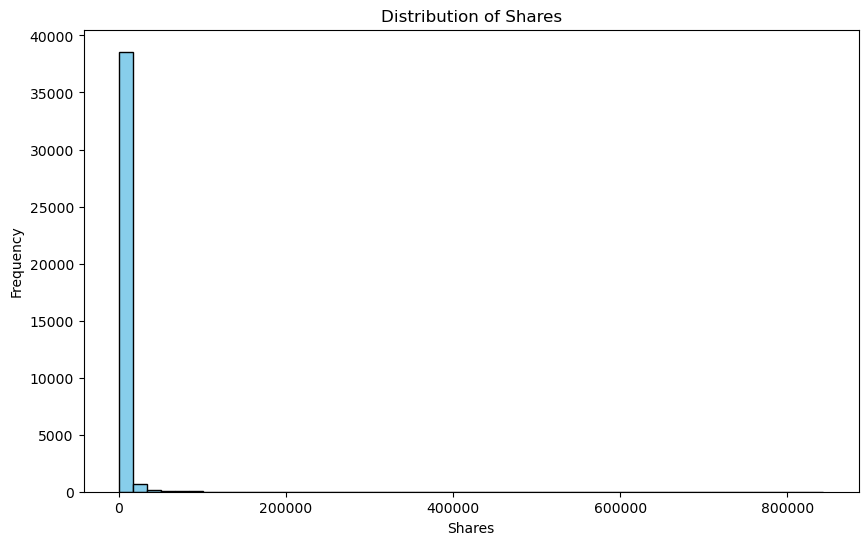

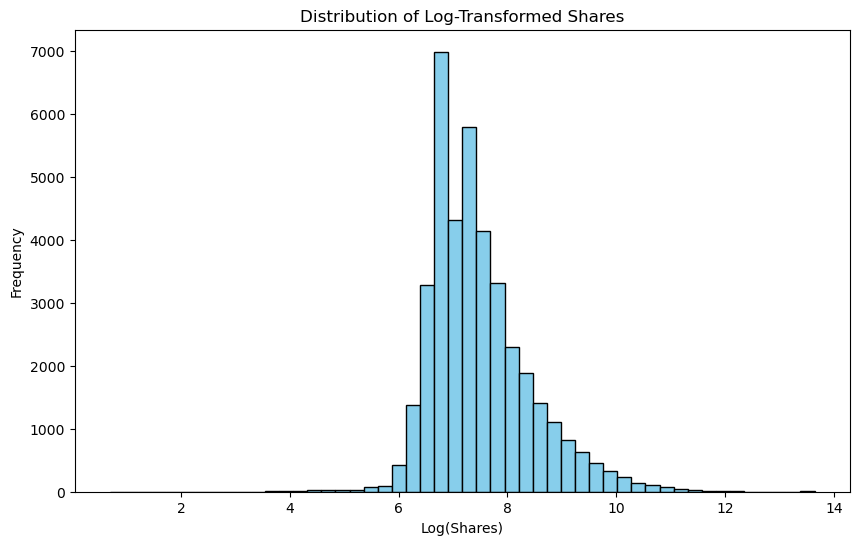

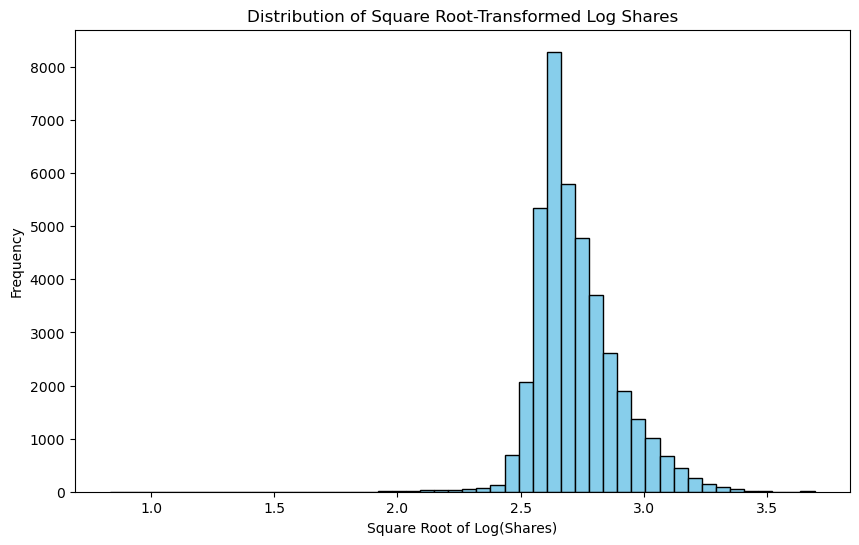

In [2]:
# Plot the 'shares' column
plt.figure(figsize=(10, 6))
plt.hist(mashable[' shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

# Take log transformation of the 'shares' column
mashable['log_shares'] = np.log(mashable[' shares'] + 1)

# Plot the log-transformed 'shares' column
plt.figure(figsize=(10, 6))
plt.hist(mashable['log_shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Log-Transformed Shares')
plt.xlabel('Log(Shares)')
plt.ylabel('Frequency')
plt.show()

# Apply square root transformation on the log_shares data
mashable['sqrt_log_shares'] = np.sqrt(mashable['log_shares'])

# Plot the square root-transformed log_shares column
plt.figure(figsize=(10, 6))
plt.hist(mashable['sqrt_log_shares'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Square Root-Transformed Log Shares')
plt.xlabel('Square Root of Log(Shares)')
plt.ylabel('Frequency')
plt.show()

y=mashable['log_shares']
X=mashable.drop(columns=['sqrt_log_shares', ' shares', 'url', ' timedelta', 'log_shares'])

X = X.dropna()
y = y.dropna()

In [3]:
X=pd.get_dummies(X, drop_first=False, dtype=int)
X = sm.add_constant(X)
X.head()

,const,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,1.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,1.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,1.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,1.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,1.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [4]:
y.head()

0    6.386879
1    6.568078
2    7.313887
3    7.090910
4    6.226537
Name: log_shares, dtype: float64

In [5]:
def stepwise_regression(X, y):
    improved = True
    
    while improved:
        model = sm.OLS(y, X).fit()
        pvalues_no_const = model.pvalues.drop('const')
        max_pvalue = pvalues_no_const.max()
        print('Max pvalue is: ', max_pvalue, '. All predictors are now significant.')
        
        if max_pvalue > 0.05:
            worst_predictor = pvalues_no_const.idxmax()
            print('Dropping ', worst_predictor, 'with a p-value of: ', max_pvalue)
            X=X.drop(columns=[worst_predictor])
        else:
            improved = False

    return X, model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
significant_predictors_train, final_model = stepwise_regression(X_train, y_train)

significant_predictors_test = X_test[significant_predictors_train.columns]

Max pvalue is:  0.8611376794683997 . All predictors are now significant.
Dropping   global_sentiment_polarity with a p-value of:  0.8611376794683997
Max pvalue is:  0.8181626035833226 . All predictors are now significant.
Dropping   n_non_stop_words with a p-value of:  0.8181626035833226
Max pvalue is:  0.7594526116726138 . All predictors are now significant.
Dropping   min_negative_polarity with a p-value of:  0.7594526116726138
Max pvalue is:  0.715790751186672 . All predictors are now significant.
Dropping   kw_max_max with a p-value of:  0.715790751186672
Max pvalue is:  0.7143481462096934 . All predictors are now significant.
Dropping   self_reference_max_shares with a p-value of:  0.7143481462096934
Max pvalue is:  0.6834452605146429 . All predictors are now significant.
Dropping   avg_positive_polarity with a p-value of:  0.6834452605146429
Max pvalue is:  0.5946904875508705 . All predictors are now significant.
Dropping   max_negative_polarity with a p-value of:  0.594690487550

#### Build Regression Tree

In [7]:
significant_predictors_train.columns

Index(['const', ' n_tokens_title', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech', ' kw_min_min',
       ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_rate_positive_words', ' rate_positive_words',
       ' rate_negative_words', ' min_positive_polarity',
       ' avg_negative_polarity', ' title_subjectivity',
    

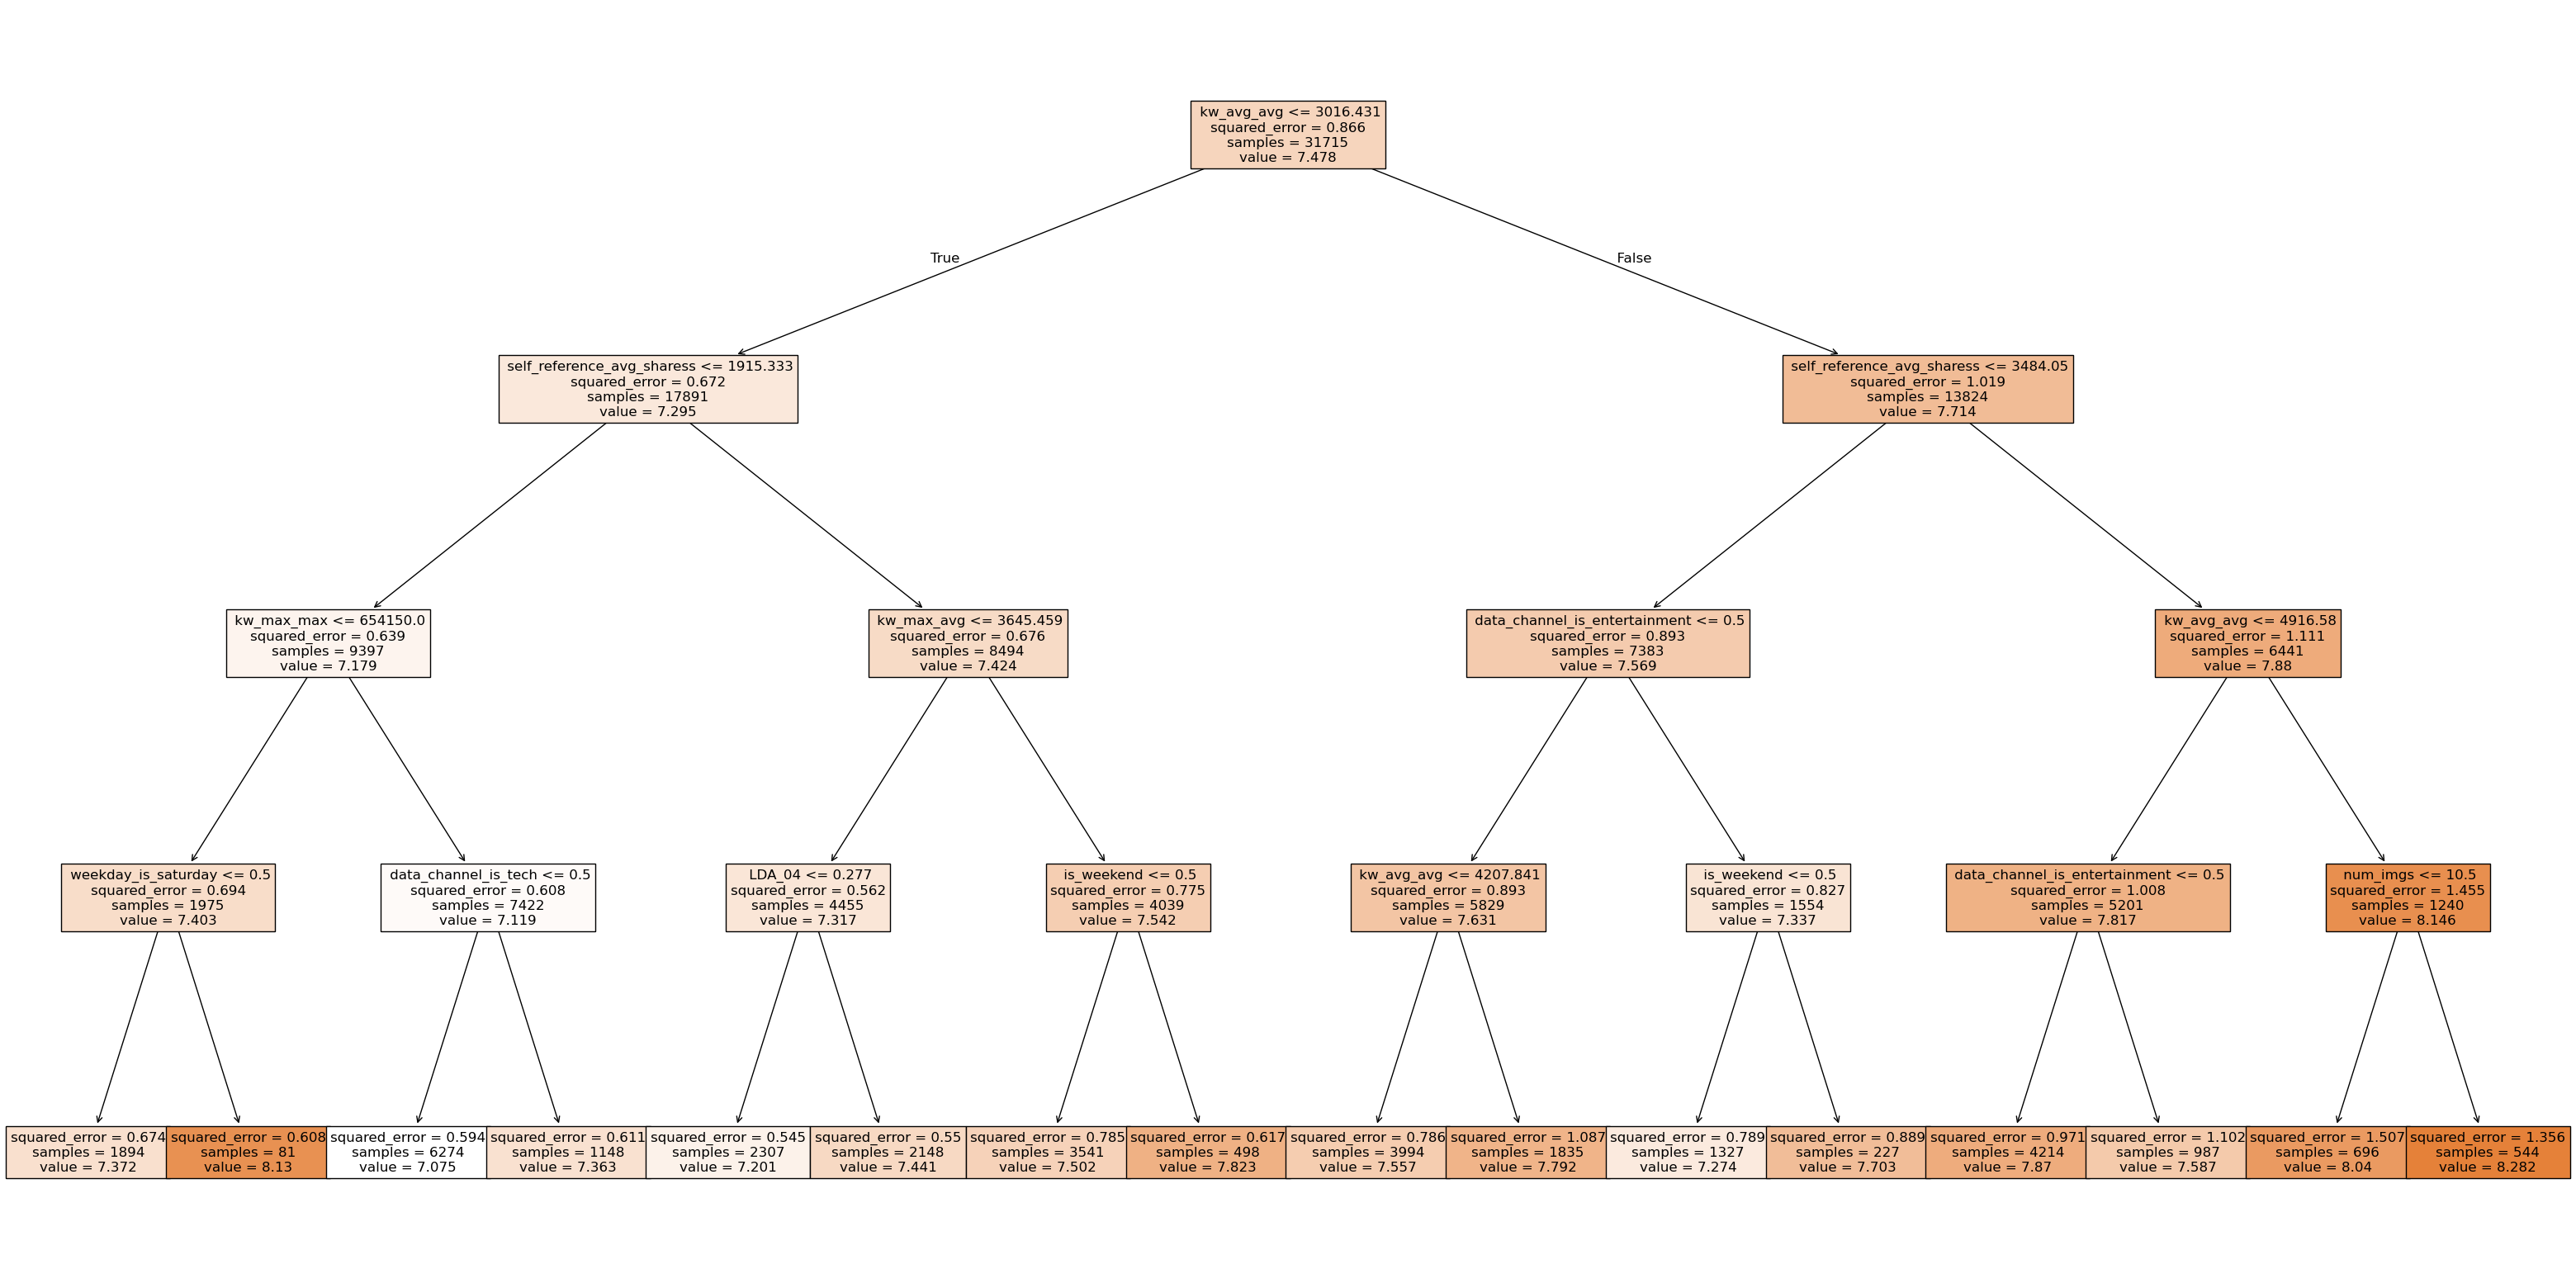

In [8]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)

plt.figure(figsize=(40, 20))
plot_tree(reg_tree, filled=True, feature_names=X_train.columns.tolist(), fontsize=12)
plt.show()

In [9]:
X.columns

Index(['const', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens',
       ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs',
       ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polari

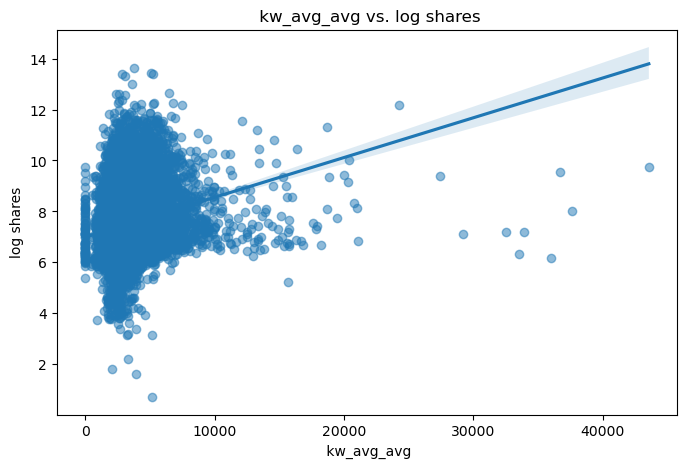

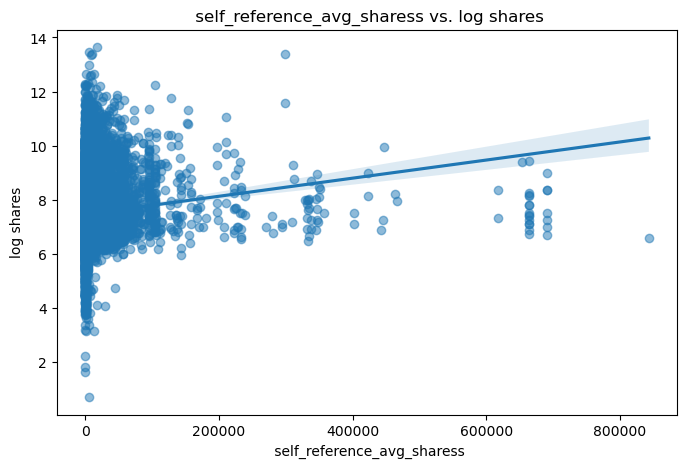

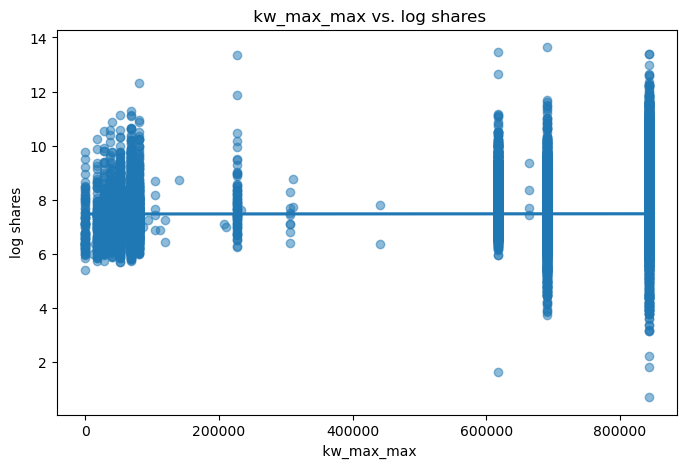

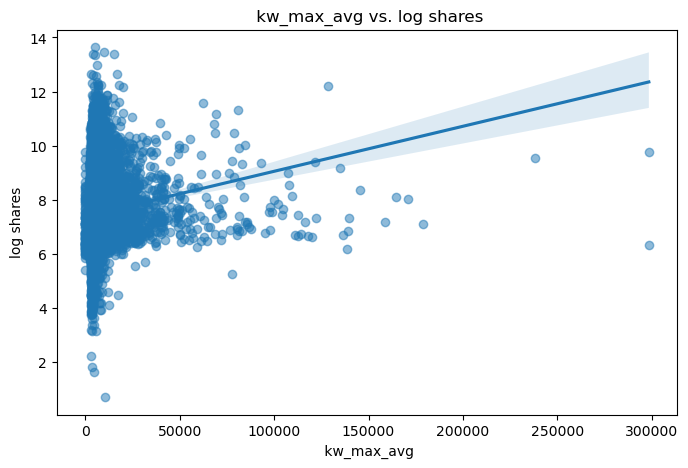

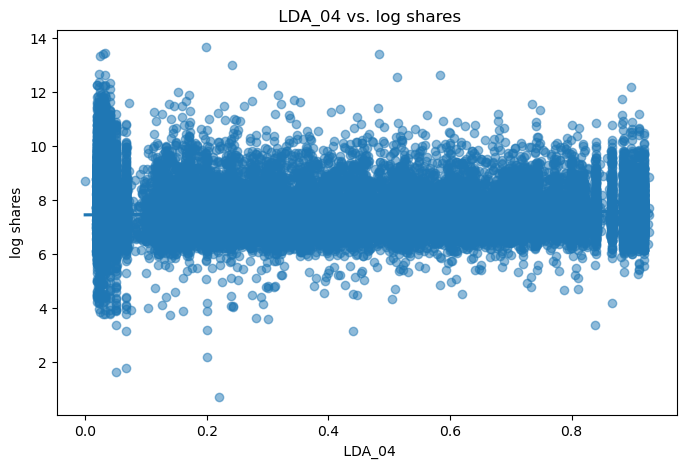

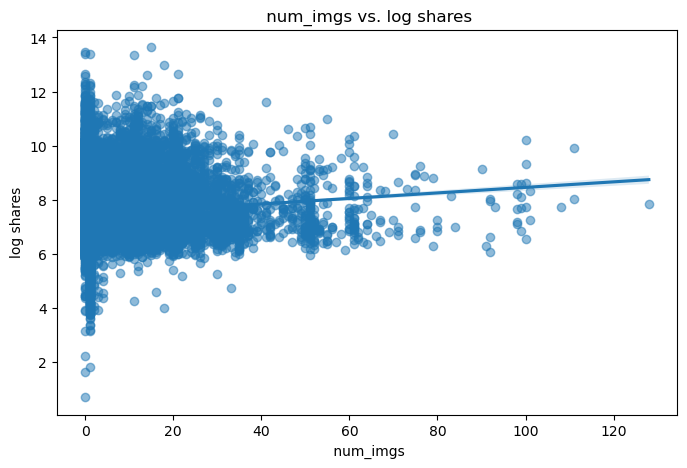

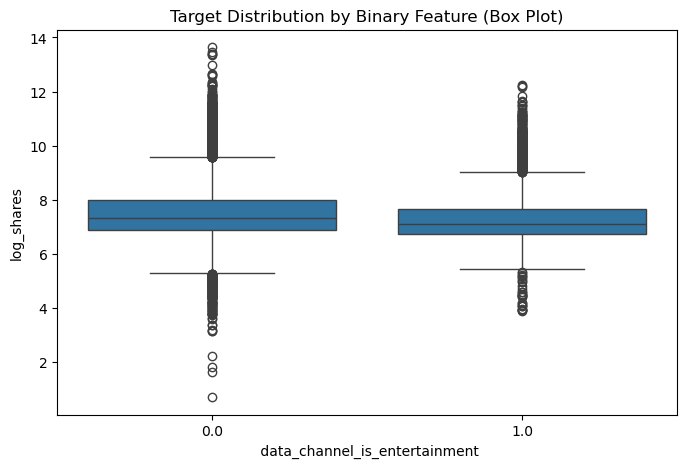

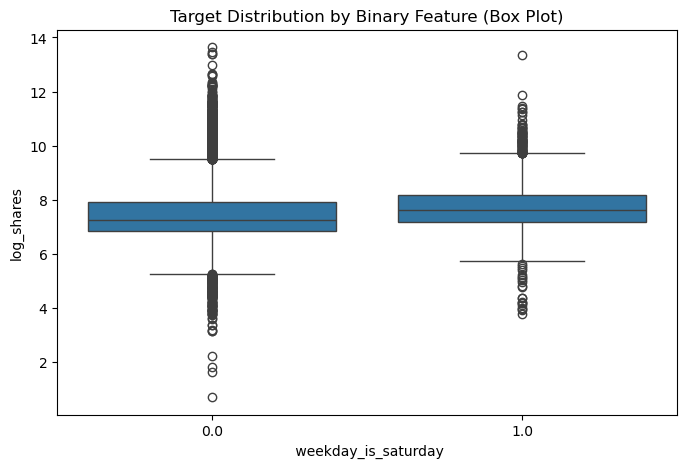

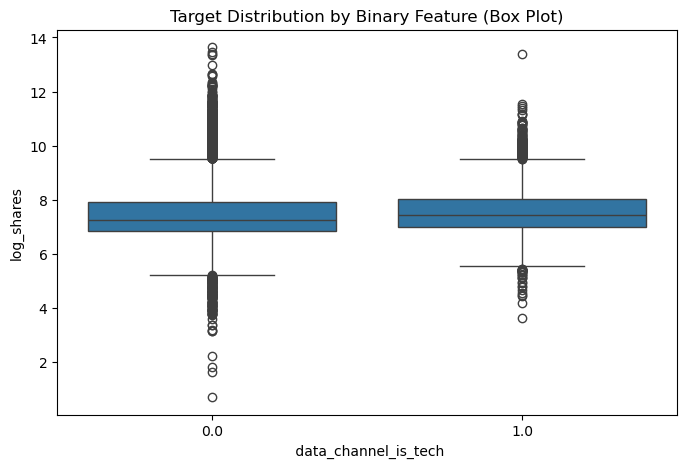

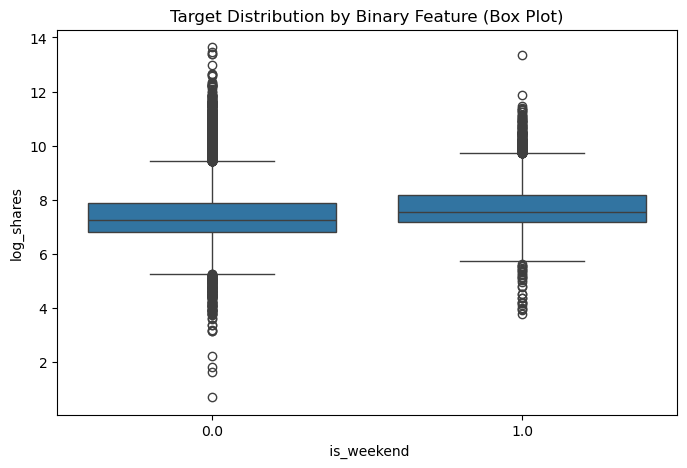

In [10]:
important_continuous_features=[' kw_avg_avg', ' self_reference_avg_sharess', ' kw_max_max', ' kw_max_avg', ' LDA_04', ' num_imgs']
important_binary_features=[' data_channel_is_entertainment', ' weekday_is_saturday', ' data_channel_is_tech', ' is_weekend']

for feature in important_continuous_features:
    plt.figure(figsize=(8, 5))
    sns.regplot(x=feature, y=y, data=mashable, scatter_kws={'alpha':0.5})
    plt.title(f'{feature} vs. {'log shares'}')
    plt.xlabel(feature) 
    plt.ylabel('log shares')
    plt.show()

for feature in important_binary_features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=feature, y=y, data=X)
    plt.title('Target Distribution by Binary Feature (Box Plot)')
    plt.show()

#### Additional Relationship Visualizations and Analysis

## Linear Regression Modeling

Build and tune a linear regression model with high
predictive power, explaining to Mashable which features most influence the number of
shares.
1. Split the data into training and testing sets. Use the training set for model fitting
and the testing set to check for overfitting and predictive performance.
2. Explore transformations of the target and other variables.
3. Explore higher-order terms.
4. Reduce the model using the following methods:
•Stepwise model evaluation methods to remove insignificant variables.
•LASSO regression to fit the full model and remove insignificant variables.
Tune the model to find the best α.
5. Write a section in your technical report that reports the out-of-sample perfor-
mance of the models. Discuss the most significant predictors and evaluate the
model?s usefulness for predicting future shares

1. Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("R^2 for Training Set:", r2_score(y_train, y_train_pred))
print("R^2 for Testing Set:", r2_score(y_test, y_test_pred))

R^2 for Training Set: 0.12618247740340183
R^2 for Testing Set: 0.12742226784989086


2. Explore transformations

In [12]:
predictor_skewness = X.skew()
print("Skewness of predictors:")
print(predictor_skewness)

highly_skewed_predictors = predictor_skewness[abs(predictor_skewness) > 1]
print("\nHighly Skewed Predictors:")
print(highly_skewed_predictors)


for col in highly_skewed_predictors.index:
    X[col] = X[col].replace([np.inf, -np.inf], np.nan)
    X[col] = X[col].fillna(1e-9)
    X[col] = X[col].clip(lower=1e-9)
    X[f'log_{col}'] = np.log1p(X[col])


X_transformed = X.drop(columns=highly_skewed_predictors.index)

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("Linear Regression with Transformed Predictors:")
print("R^2 on Training Data:", r2_score(y_train, y_train_pred))
print("R^2 on Testing Data:", r2_score(y_test, y_test_pred))

Skewness of predictors:
const                               0.000000
 n_tokens_title                     0.165320
 n_tokens_content                   2.945422
 n_unique_tokens                  198.655116
 n_non_stop_words                 198.792445
 n_non_stop_unique_tokens         198.443294
 num_hrefs                          4.013495
 num_self_hrefs                     5.172751
 num_imgs                           3.946596
 num_videos                         7.019533
 average_token_length              -4.576012
 num_keywords                      -0.147251
 data_channel_is_lifestyle          3.993019
 data_channel_is_entertainment      1.683585
 data_channel_is_bus                1.876870
 data_channel_is_socmed             3.758880
 data_channel_is_tech               1.619976
 data_channel_is_world              1.405169
 kw_min_min                         2.374947
 kw_max_min                        35.328434
 kw_avg_min                        31.306108
 kw_min_max                    

Higher Order Terms

In [13]:
from sklearn.preprocessing import PolynomialFeatures

continuous_cols = X_transformed.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X_transformed.select_dtypes(include=['object', 'category']).columns


X_continuous = X_transformed[continuous_cols]
X_categorical = X_transformed[categorical_cols]

poly = PolynomialFeatures(2, include_bias=False)

X_continuous_transformed = poly.fit_transform(X_continuous)
transformed_feature_names = poly.get_feature_names_out(continuous_cols)
X_cont_poly = pd.DataFrame(X_continuous_transformed, columns=transformed_feature_names, index=X_continuous.index)

if not X_categorical.empty:

    X_categorical_dummies = pd.get_dummies(X_categorical, drop_first=True)
    X_full = pd.concat([X_cont_poly, X_categorical_dummies], axis=1)
else:
    X_full = X_cont_poly

if not X_categorical.empty:
    for continuous_col in continuous_cols:
        for dummy_col in X_categorical_dummies.columns:
            interaction_term_name = f"{continuous_col}_x_{dummy_col}"
            X_full[interaction_term_name] = X_continuous[continuous_col] * X_categorical_dummies[dummy_col]


X_train, X_test, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

print("R^2 on Training Data:", r2_score(y_train, y_train_pred))
print("R^2 on Testing Data:", r2_score(y_test, y_test_pred))

R^2 on Training Data: 0.2288691356423267
R^2 on Testing Data: 0.11394061786179266


Reducing with Lasso

In [14]:

# I had 1800 columns so my stepwise was taking ages to work, so I did this.
print(X_full.describe)
correlations = X_full.corrwith(y).abs()


high_corr_predictors = correlations[correlations > 0.1].index
X_reduced = X_full[high_corr_predictors]

print(f"Reduced predictors based on correlation: {len(high_corr_predictors)}")
print(X_reduced.columns)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
X_train_const = sm.add_constant(X_train)

model_reduced = sm.OLS(y_train, X_train_const).fit()
print(model_reduced.summary())



<bound method NDFrame.describe of        const   n_tokens_title   num_keywords     kw_avg_max   kw_min_avg  \
0        1.0             12.0            5.0       0.000000     0.000000   
1        1.0              9.0            4.0       0.000000     0.000000   
2        1.0              9.0            6.0       0.000000     0.000000   
3        1.0              9.0            7.0       0.000000     0.000000   
4        1.0             13.0            7.0       0.000000     0.000000   
...      ...              ...            ...            ...          ...   
39639    1.0             11.0            8.0  374962.500000  2514.742857   
39640    1.0             12.0            7.0  192985.714286  1664.267857   
39641    1.0             10.0            8.0  295850.000000  1753.882353   
39642    1.0              6.0            5.0  254600.000000     0.000000   
39643    1.0             10.0            4.0  366200.000000  3035.080555   

        global_sentiment_polarity   global_rate_posit

/opt/anaconda3/envs/stats/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Reduced predictors based on correlation: 268
Index([' kw_min_avg', 'log_ data_channel_is_world', 'log_ kw_max_avg',
       'log_ kw_avg_avg', 'log_ self_reference_min_shares',
       'log_ self_reference_max_shares', 'log_ self_reference_avg_sharess',
       'log_ is_weekend', 'log_ LDA_02', 'log_ LDA_03',
       ...
       'log_ LDA_02 log_ global_subjectivity',
       'log_ LDA_02 log_ global_rate_negative_words',
       'log_ LDA_02 log_ rate_positive_words',
       'log_ LDA_02 log_ min_positive_polarity',
       'log_ LDA_02 log_ max_negative_polarity', 'log_ LDA_03^2',
       'log_ LDA_03 log_ LDA_04', 'log_ LDA_03 log_ global_subjectivity',
       'log_ LDA_03 log_ rate_positive_words',
       'log_ LDA_03 log_ max_negative_polarity'],
      dtype='object', length=268)
                            OLS Regression Results                            
Dep. Variable:             log_shares   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:

Lasso Regression with Fixed Alpha (0.002):
Out-of-Sample R^2: 0.1441
In-Sample R^2: 0.1425


/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7052862042000925, tolerance: 2.179057480707196
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.1620883590330777, tolerance: 2.179057480707196
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9479116498805524, tolerance: 2.179057480707196
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/

Best Alpha Found by Lasso CV: 0.000207


/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.953e+03, tolerance: 2.747e+00
  model = cd_fast.enet_coordinate_descent(


Final Lasso Regression with Best Alpha (0.000207):
Out-of-Sample R^2: 0.1479


/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.212e+03, tolerance: 2.747e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.379e+01, tolerance: 2.747e+00
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

MSE Values for Different Alphas: [0.729900427452232, 0.7323202821611601, 0.7343524741823189, 0.7362193346339794, 0.7386731078804798, 0.7408362268346725, 0.7427826786525485, 0.7444167082726809, 0.746290065741259, 0.7481106840517432]


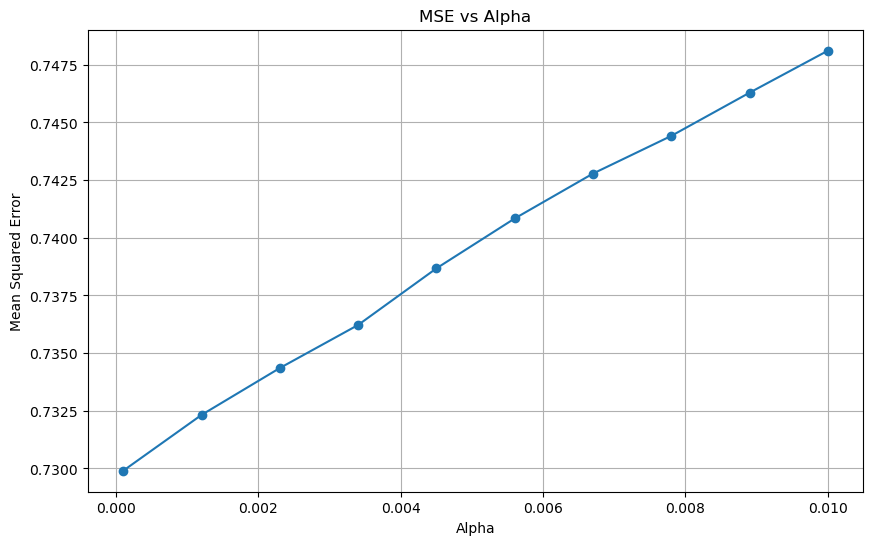

In [15]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

lasso = Lasso(alpha=0.002, max_iter=1000, random_state=42)
lasso.fit(X_train_scaled, y_train)

preds_lasso = lasso.predict(X_test_scaled)
r2_out_of_sample = r2_score(y_test, preds_lasso)
print(f"Lasso Regression with Fixed Alpha (0.002):")
print(f"Out-of-Sample R^2: {r2_out_of_sample:.4f}")

preds_lasso_train = lasso.predict(X_train_scaled)
r2_in_sample = r2_score(y_train, preds_lasso_train)
print(f"In-Sample R^2: {r2_in_sample:.4f}")

lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print(f"Best Alpha Found by Lasso CV: {best_alpha:.6f}")

lasso_best = Lasso(alpha=best_alpha, max_iter=1000, random_state=42)
lasso_best.fit(X_train_scaled, y_train)


final_preds_lasso = lasso_best.predict(X_test_scaled)
final_r2_out_of_sample = r2_score(y_test, final_preds_lasso)
print(f"Final Lasso Regression with Best Alpha ({best_alpha:.6f}):")
print(f"Out-of-Sample R^2: {final_r2_out_of_sample:.4f}")


alphas = np.linspace(0.0001, 0.01, 10)
mse_vals = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    preds_scaled = lasso.predict(X_test_scaled)
    mse_vals.append(mean_squared_error(y_test, preds_scaled))

    

print("MSE Values for Different Alphas:", mse_vals)

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_vals, marker='o')
plt.title('MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [16]:
print("RESULTS FROM ABOVE FOR CLARITY")

print(f"Lasso Regression with Fixed Alpha (0.002):")
print(f"Out-of-Sample R^2: {r2_out_of_sample:.4f}")
print(f"In-Sample R^2: {r2_in_sample:.4f}")
print(f"Best Alpha Found by Lasso CV: {best_alpha:.6f}")
print(f"Final Lasso Regression with Best Alpha ({best_alpha:.6f}):")
print(f"Out-of-Sample R^2: {final_r2_out_of_sample:.4f}")
print("MSE Values for Different Alphas:", mse_vals)

RESULTS FROM ABOVE FOR CLARITY
Lasso Regression with Fixed Alpha (0.002):
Out-of-Sample R^2: 0.1441
In-Sample R^2: 0.1425
Best Alpha Found by Lasso CV: 0.000207
Final Lasso Regression with Best Alpha (0.000207):
Out-of-Sample R^2: 0.1479
MSE Values for Different Alphas: [0.729900427452232, 0.7323202821611601, 0.7343524741823189, 0.7362193346339794, 0.7386731078804798, 0.7408362268346725, 0.7427826786525485, 0.7444167082726809, 0.746290065741259, 0.7481106840517432]


Stepwise 

In [17]:

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)


def stepwise_regression(X, y):
    improved = True
    while improved:
        model = sm.OLS(y, X).fit()
        pvalues_no_const = model.pvalues.drop('const')
        max_pvalue = pvalues_no_const.max()
        print(f'Max p-value is: {max_pvalue:.4f}')
        
        if max_pvalue > 0.05:
            worst_predictor = pvalues_no_const.idxmax()
            print(f'Dropping {worst_predictor} with p-value: {max_pvalue:.4f}')
            X = X.drop(columns=[worst_predictor])
        else:
            improved = False
    return X, model

X_train_with_const = sm.add_constant(X_train)

significant_predictors_train, stepwise_model = stepwise_regression(X_train_with_const, y_train)

print("\nFinal Significant Predictors after Stepwise Regression:")
print(significant_predictors_train.columns)


Max p-value is: 1.0000
Dropping log_ kw_avg_avg log_ self_reference_max_shares with p-value: 1.0000
Max p-value is: 0.9965
Dropping log_ num_hrefs log_ kw_max_min with p-value: 0.9965
Max p-value is: 0.9963
Dropping log_ kw_avg_min log_ is_weekend with p-value: 0.9963
Max p-value is: 0.9916
Dropping  avg_negative_polarity log_ self_reference_avg_sharess with p-value: 0.9916
Max p-value is: 0.9758
Dropping  max_positive_polarity log_ self_reference_min_shares with p-value: 0.9758
Max p-value is: 0.9537
Dropping log_ n_tokens_content log_ is_weekend with p-value: 0.9537
Max p-value is: 0.9539
Dropping log_ kw_max_min log_ LDA_02 with p-value: 0.9539
Max p-value is: 0.9513
Dropping log_ self_reference_max_shares log_ is_weekend with p-value: 0.9513
Max p-value is: 0.9473
Dropping  kw_min_avg log_ self_reference_min_shares with p-value: 0.9473
Max p-value is: 0.9465
Dropping log_ n_unique_tokens log_ is_weekend with p-value: 0.9465
Max p-value is: 0.9417
Dropping log_ num_self_hrefs log_ d

In [18]:
final_predictors = significant_predictors_train.columns

if 'const' in final_predictors:
    final_predictors = final_predictors.drop('const')

X_filtered = X_full[final_predictors]

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

X_train_final_const = sm.add_constant(X_train_final)
X_test_final_const = sm.add_constant(X_test_final)

stepwise_final_model = sm.OLS(y_train_final, X_train_final_const).fit()

y_train_pred_final = stepwise_final_model.predict(X_train_final_const)
y_test_pred_final = stepwise_final_model.predict(X_test_final_const)

r2_train_final = r2_score(y_train_final, y_train_pred_final)
r2_test_final = r2_score(y_test_final, y_test_pred_final)

print(f"\nFinal Stepwise Regression R^2 on Training Data: {r2_train_final:.4f}")
print(f"Final Stepwise Regression R^2 on Testing Data: {r2_test_final:.4f}")


Final Stepwise Regression R^2 on Training Data: 0.1530
Final Stepwise Regression R^2 on Testing Data: 0.1483


Lasso Regression with Fixed Alpha (0.002):
Out-of-Sample R^2: 0.1366
In-Sample R^2: 0.1344


/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.497893995110644, tolerance: 2.179057480707196
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.54591223062016, tolerance: 2.179057480707196
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.463630979123991, tolerance: 2.179057480707196
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/stats/lib/python3.12/site-packages/skl

Best Alpha Found by Lasso CV: 0.000207


/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.365e+03, tolerance: 2.747e+00
  model = cd_fast.enet_coordinate_descent(


Final Lasso Regression with Best Alpha (0.000207):
Out-of-Sample R^2: 0.1394


/opt/anaconda3/envs/stats/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.254e+03, tolerance: 2.747e+00
  model = cd_fast.enet_coordinate_descent(


MSE Values for Different Alphas: [0.7373175761087991, 0.7391980418513031, 0.7405974072027676, 0.7427348197000823, 0.7440924348423626, 0.74561683538429, 0.747626610248385, 0.7500265036726212, 0.7524203896312959, 0.7546006427162535]


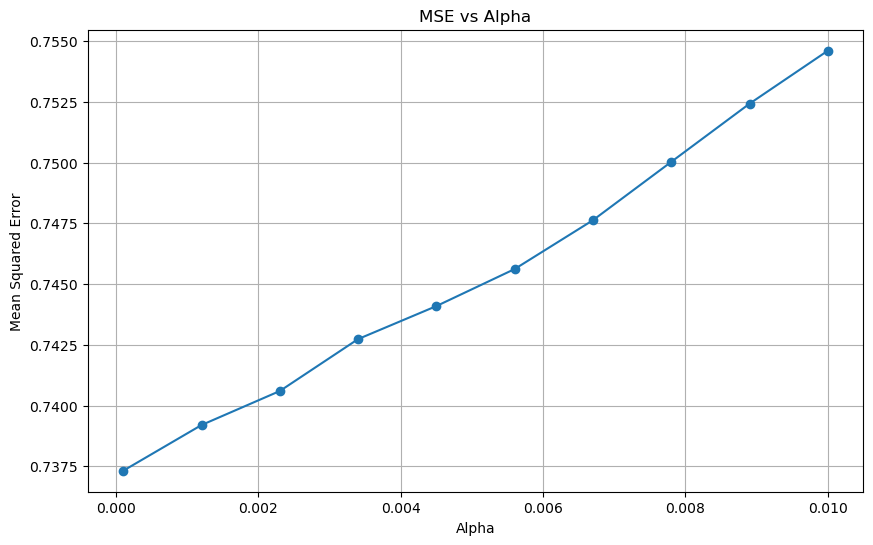

In [19]:

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

lasso = Lasso(alpha=0.002, max_iter=1000, random_state=42)
lasso.fit(X_train_scaled, y_train)

preds_lasso = lasso.predict(X_test_scaled)
r2_out_of_sample = r2_score(y_test, preds_lasso)
print(f"Lasso Regression with Fixed Alpha (0.002):")
print(f"Out-of-Sample R^2: {r2_out_of_sample:.4f}")

preds_lasso_train = lasso.predict(X_train_scaled)
r2_in_sample = r2_score(y_train, preds_lasso_train)
print(f"In-Sample R^2: {r2_in_sample:.4f}")

lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha = lasso_cv.alpha_
print(f"Best Alpha Found by Lasso CV: {best_alpha:.6f}")

lasso_best = Lasso(alpha=best_alpha, max_iter=1000, random_state=42)
lasso_best.fit(X_train_scaled, y_train)


final_preds_lasso = lasso_best.predict(X_test_scaled)
final_r2_out_of_sample = r2_score(y_test, final_preds_lasso)
print(f"Final Lasso Regression with Best Alpha ({best_alpha:.6f}):")
print(f"Out-of-Sample R^2: {final_r2_out_of_sample:.4f}")


alphas = np.linspace(0.0001, 0.01, 10)
mse_vals = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=1000, random_state=42)
    lasso.fit(X_train_scaled, y_train)
    preds_scaled = lasso.predict(X_test_scaled)
    mse_vals.append(mean_squared_error(y_test, preds_scaled))

    

print("MSE Values for Different Alphas:", mse_vals)

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_vals, marker='o')
plt.title('MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [20]:
print("RESULTS FROM ABOVE FOR CLARITY")

print(f"Lasso Regression with Fixed Alpha (0.002):")
print(f"Out-of-Sample R^2: {r2_out_of_sample:.4f}")
print(f"In-Sample R^2: {r2_in_sample:.4f}")
print(f"Best Alpha Found by Lasso CV: {best_alpha:.6f}")
print(f"Final Lasso Regression with Best Alpha ({best_alpha:.6f}):")
print(f"Out-of-Sample R^2: {final_r2_out_of_sample:.4f}")
print("MSE Values for Different Alphas:", mse_vals)

RESULTS FROM ABOVE FOR CLARITY
Lasso Regression with Fixed Alpha (0.002):
Out-of-Sample R^2: 0.1366
In-Sample R^2: 0.1344
Best Alpha Found by Lasso CV: 0.000207
Final Lasso Regression with Best Alpha (0.000207):
Out-of-Sample R^2: 0.1394
MSE Values for Different Alphas: [0.7373175761087991, 0.7391980418513031, 0.7405974072027676, 0.7427348197000823, 0.7440924348423626, 0.74561683538429, 0.747626610248385, 0.7500265036726212, 0.7524203896312959, 0.7546006427162535]


## Regression Tree Modeling

Build and tune a regression tree model.
1. Use the same training and testing sets as above.
2. Use cost-complexity pruning and cross-validation to find a model that fits well
on out-of-sample data.
3. Fit a random forest regression model, using cost-complexity pruning for the individual trees.
4. Write a section in your technical report that reports the out-of-sample perfor-
mance of the models. Discuss the model’s usefulness for predicting future shares.

In [21]:
X_train_tree = X_train.copy()
X_test_tree = X_test.copy()
y_train_tree = y_train.copy()
y_test_tree = y_test.copy()

Best ccp_alpha: 0.0
Pruned Decision Tree MSE: 0.760002652048813
Pruned Decision Tree R2: 0.11339532348363379


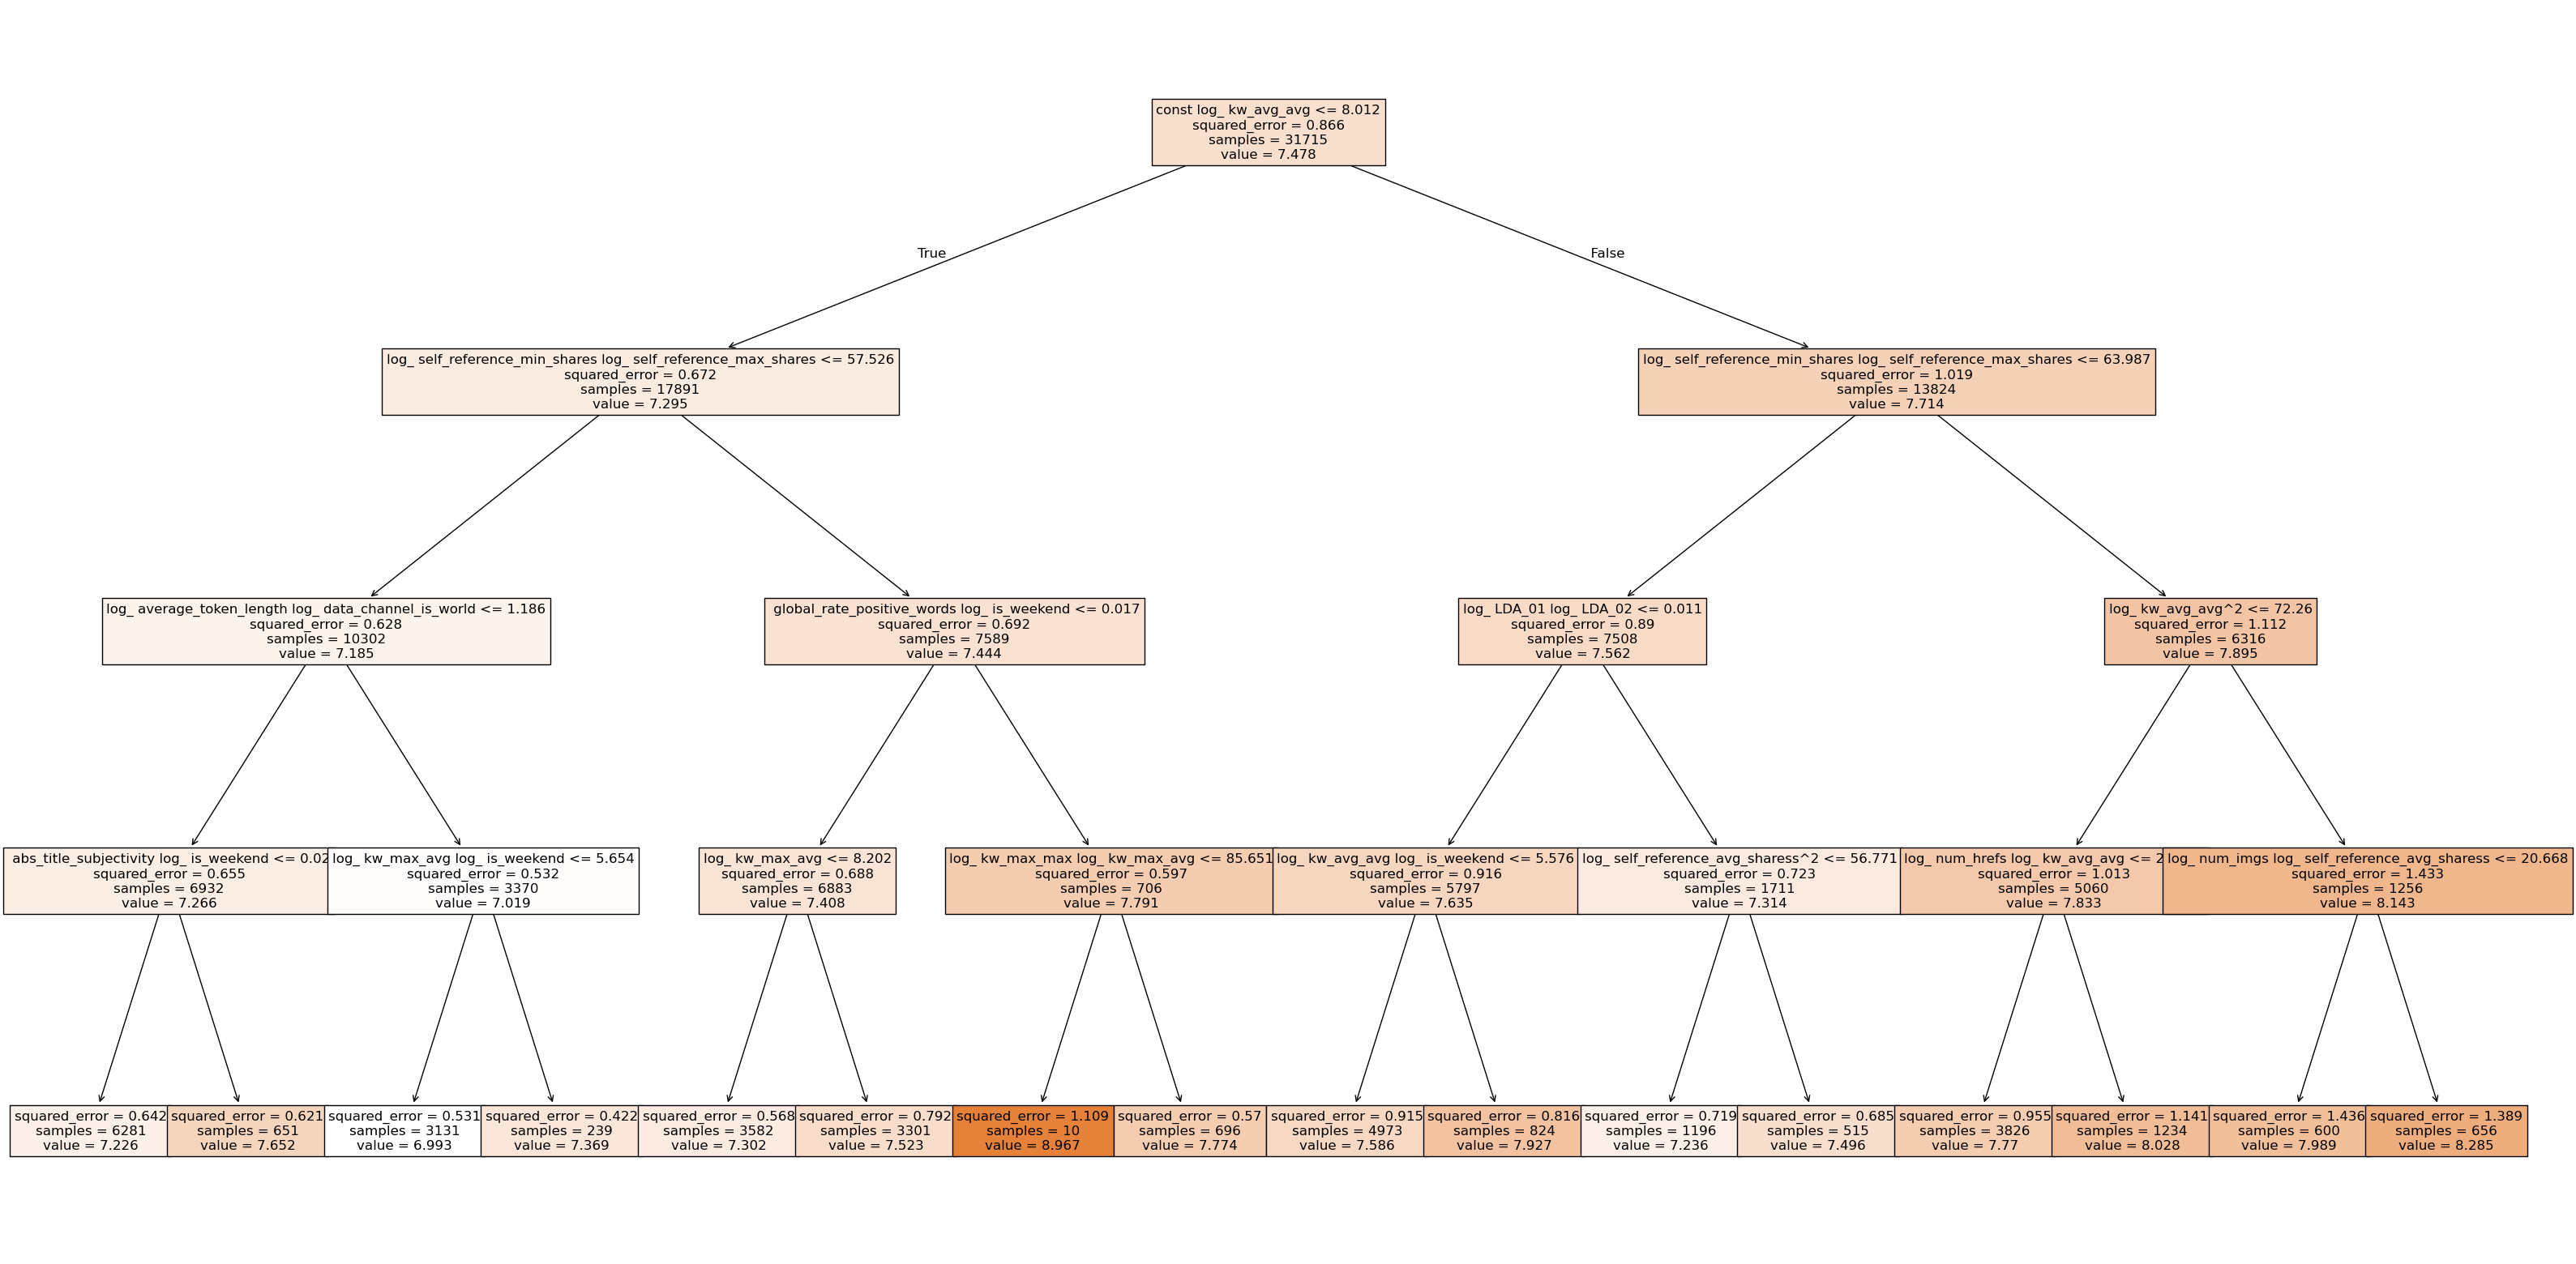

Out-of-Sample Pruned Decision Tree MSE: 0.760002652048813
Out-of-Sample Pruned Decision Tree R2: 0.11339532348363379


In [22]:
# Perform grid search to find the optimal ccp_alpha
param_grid = {'ccp_alpha': np.linspace(0, 0.01, 50)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_tree, y_train_tree)

# Get the best ccp_alpha
best_ccp_alpha = grid_search.best_params_['ccp_alpha']
print(f"Best ccp_alpha: {best_ccp_alpha}")

# Fit the decision tree regressor with the optimal ccp_alpha
best_reg_tree = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10, ccp_alpha=best_ccp_alpha)
best_reg_tree.fit(X_train_tree, y_train_tree)

# Predict and evaluate the model
y_pred_pruned = best_reg_tree.predict(X_test_tree)
mse_pruned = mean_squared_error(y_test_tree, y_pred_pruned)
r2_pruned = r2_score(y_test_tree, y_pred_pruned)

print(f"Pruned Decision Tree MSE: {mse_pruned}")
print(f"Pruned Decision Tree R2: {r2_pruned}")

# Plot the pruned decision tree
plt.figure(figsize=(40, 20))
plot_tree(best_reg_tree, filled=True, feature_names=X_train_tree.columns.tolist(), fontsize=12)
plt.show()
# Test the pruned decision tree with out-of-sample data
y_pred_out_of_sample = best_reg_tree.predict(X_test_tree)
mse_out_of_sample = mean_squared_error(y_test_tree, y_pred_out_of_sample)
r2_out_of_sample = r2_score(y_test_tree, y_pred_out_of_sample)

print(f"Out-of-Sample Pruned Decision Tree MSE: {mse_out_of_sample}")
print(f"Out-of-Sample Pruned Decision Tree R2: {r2_out_of_sample}")


In [23]:
# Fit the random forest regressor with the optimal ccp_alpha for individual trees
random_forest = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=4, min_samples_leaf=10, ccp_alpha=best_ccp_alpha)
random_forest.fit(X_train_tree, y_train_tree)

# Predict and evaluate the model
y_pred_rf = random_forest.predict(X_test_tree)
mse_rf = mean_squared_error(y_test_tree, y_pred_rf)
r2_rf = r2_score(y_test_tree, y_pred_rf)

print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")

Random Forest MSE: 0.7481149895085065
Random Forest R2: 0.12726324509242215


## Conclusion

Compare each model’s predictive accuracy on the test set. Choose the
best-performing model as the final predictive model. Write a concluding section in
your technical report that addresses Mashable?s business concerns and presents your
final model along with your confidence in its predictions.
2